# Import packages 

In [1]:
using Plots
using Statistics
using DataFrames
using CSV
using LaTeXStrings
using GLM

include("./UncValue.jl")
using .UncValue

# Read data 

In [2]:
data = DataFrame(CSV.File("data.csv"))

,Distance,Unc_dist,T1,Unc_T1,T2,Unc_T2,T3,Unc_T3
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.1,116.6,0.1,98.0,0.1,79.0,0.1
2,20,0.1,92.8,0.1,74.7,0.1,54.0,0.1
3,30,0.1,73.6,0.1,57.1,0.1,40.3,0.1
4,40,0.1,59.4,0.1,47.3,0.1,33.2,0.1
5,50,0.1,49.5,0.1,39.3,0.1,29.6,0.1
6,60,0.1,42.7,0.1,34.2,0.1,27.7,0.1
7,70,0.1,38.2,0.1,31.1,0.1,26.9,0.1
8,80,0.1,35.0,0.1,29.3,0.1,26.5,0.1
9,90,0.1,33.1,0.1,28.2,0.1,26.4,0.1


In [3]:
Ta = Value(24.0, 0.1) #Environmental temperature

d1 = Value(3.2, 0.01) / 100 #Aluminium bar diameter in meters
d2 = Value(3.0, 0.01) / 100 #Laton bar diameter in meters
d3 = Value(3.0, 0.01) / 100 #Iron bar diameter in meters

r1 = d1 / 2 #Aluminium bar radius in meters
r2 = d2 / 2 #Laton bar radius in meters
r3 = d3 / 2 #Iron bar radius in meters

(1500.0 ± 5.0)·10^-5


# Process data

In [4]:
nrows = nrow(data)

distances = []
T1 = []
T2 = []
T3 = []

for i in 1 : nrows
    
    push!(distances, Value(Float64(data[!, :Distance][i]), Float64(data[!, :Unc_dist][i])))
    
    push!(T1, Value(Float64(data[!, :T1][i]), Float64(data[!, :Unc_T1][i])))
    
    push!(T2, Value(Float64(data[!, :T2][i]), Float64(data[!, :Unc_T2][i])))
    
    push!(T3, Value(Float64(data[!, :T3][i]), Float64(data[!, :Unc_T3][i])))
    
end

# Plot processed data with errors using val and unc functions 

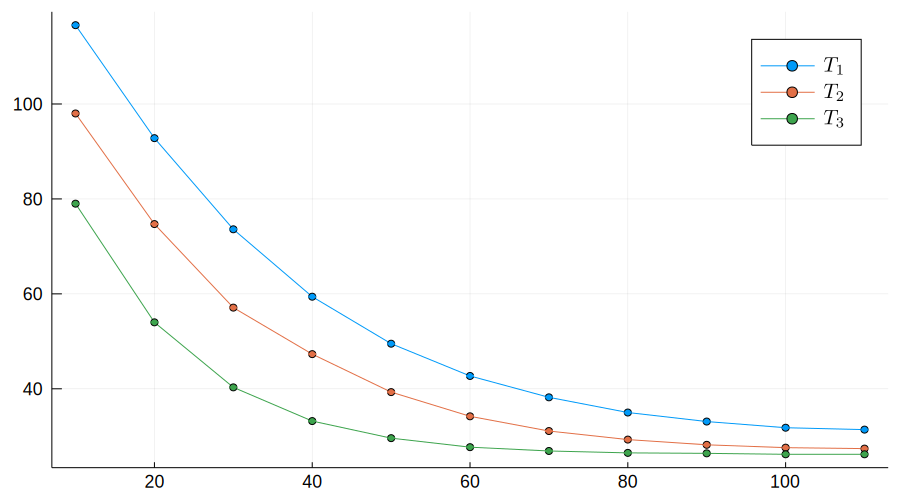

In [5]:
plot(val(distances), [val(T1), val(T2), val(T3)], label=[L"$T_1$" L"$T_2$" L"$T_3$"], m=:circle, 
    legendfont=14, tickfont=12, size=(900, 500), err=[unc(T1) unc(T2) unc(T3)])

In fact errors are too small to be appreciated.

# Implement $\ln{\theta_x}=-px+\ln{\theta_0}$ where $\theta_x=T_x-T_a$

In [6]:
Theta1_x = T1 .- [Ta for i in 1 : length(T1)]

Theta2_x = T2 .- [Ta for i in 1 : length(T2)]

Theta3_x = T3 .- [Ta for i in 1 : length(T3)];

In [7]:
ln_theta1_x = log.(Theta1_x)

ln_theta2_x = log.(Theta2_x)

ln_theta3_x = log.(Theta3_x);

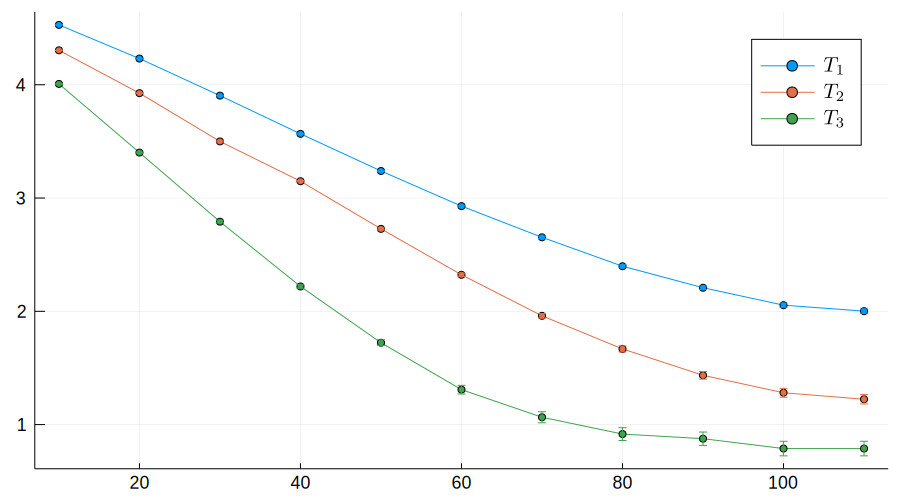

In [8]:
plot(val(distances), [val(ln_theta1_x), val(ln_theta2_x), val(ln_theta3_x)], label=[L"$T_1$" L"$T_2$" L"$T_3$"], 
    m=:circle, legendfont=14, tickfont=12, size=(900, 500),
    err=[unc(ln_theta1_x) unc(ln_theta2_x) unc(ln_theta3_x)])

# Perform linear regression 

In [9]:
reg_data = DataFrame(X=val(distances), Y1=val(ln_theta1_x), Y2=val(ln_theta2_x), Y3=val(ln_theta3_x))

,X,Y1,Y2,Y3
,Float64,Float64,Float64,Float64
1,10.0,4.52829,4.30407,4.00733
2,20.0,4.2312,3.92593,3.4012
3,30.0,3.90399,3.49953,2.79117
4,40.0,3.56671,3.14845,2.2192
5,50.0,3.23868,2.72785,1.72277
6,60.0,2.92852,2.32239,1.30833
7,70.0,2.65324,1.96009,1.06471
8,80.0,2.3979,1.66771,0.916291
9,90.0,2.20827,1.43508,0.875469


### T1 

In [10]:
LR1 = GLM.lm(@formula(Y1 ~ X), reg_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y1 ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)   4.66581    0.0900864    51.79    <1e-11   4.46203     4.8696   
X            -0.0266842  0.00132825  -20.09    <1e-8   -0.0296889  -0.0236795
─────────────────────────────────────────────────────────────────────────────

In [11]:
p1 = Value(coef(LR1)[2], stderror(LR1)[2])
theta0_1 = Value(coef(LR1)[1], stderror(LR1)[1])

println("p: ", p1, "theta_0: ", theta0_1)

p: (-26.7 ± 1.3)·10^-3
theta_0: (466.6 ± 9.0)·10^-2



### T2 

In [12]:
LR2 = GLM.lm(@formula(Y2 ~ X), reg_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y2 ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)   4.45802  0.119042     37.45    <1e-10   4.18873     4.72731  
X            -0.03264  0.00175519  -18.60    <1e-7   -0.0366105  -0.0286695
───────────────────────────────────────────────────────────────────────────

In [13]:
p2 = Value(coef(LR2)[2], stderror(LR2)[2])
theta0_2 = Value(coef(LR2)[1], stderror(LR2)[1])

println("p: ", p2, "theta_0: ", theta0_2)

p: (-32.6 ± 1.8)·10^-3
theta_0: (44.6 ± 1.2)·10^-1



### T3 

In [14]:
LR3 = GLM.lm(@formula(Y3 ~ X), reg_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y3 ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   3.74702     0.270174   13.87     <1e-6   3.13584     4.35819  
X            -0.0323239   0.0039835  -8.11     <1e-4  -0.0413352  -0.0233126
────────────────────────────────────────────────────────────────────────────

In [15]:
p3 = Value(coef(LR3)[2], stderror(LR3)[2])
theta0_3 = Value(coef(LR3)[1], stderror(LR3)[1])

println("p: ", p3, "theta_0: ", theta0_3)

p: (-32.3 ± 4.0)·10^-3
theta_0: (37.5 ± 2.7)·10^-1



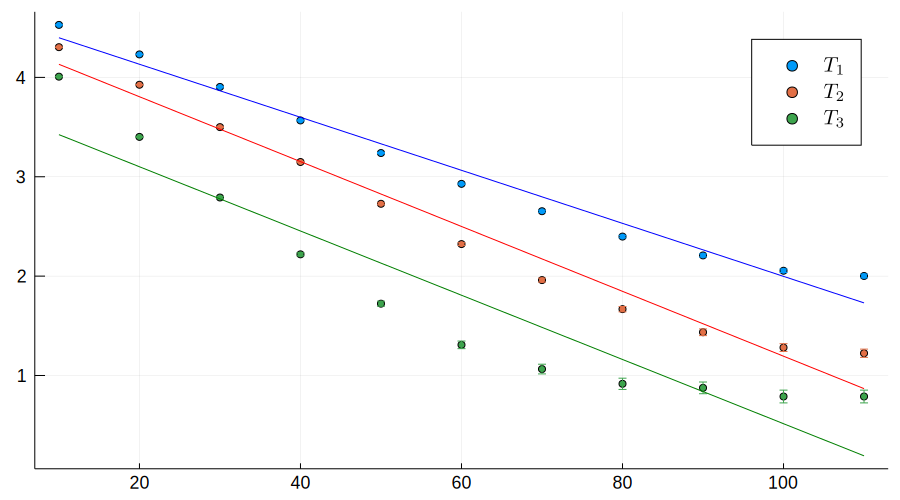

In [16]:
scatter(val(distances), [val(ln_theta1_x), val(ln_theta2_x), val(ln_theta3_x)], label=[L"$T_1$" L"$T_2$" L"$T_3$"], 
    m=:circle, legendfont=14, tickfont=12, size=(900, 500),
    err=[unc(ln_theta1_x) unc(ln_theta2_x) unc(ln_theta3_x)])

plot!(val(distances), val(theta0_1) .+ val(distances) .* val(p1), color=:blue, label="")
plot!(val(distances), val(theta0_2) .+ val(distances) .* val(p2), color=:red, label="")
plot!(val(distances), val(theta0_3) .+ val(distances) .* val(p3), color=:green, label="")

# Compute conductivities 

The conductivities for the three rods accomplish the following relation

$$
p_1^2K_1r_1=p_2^2K_2r_2=p_3^2K_3r_3
$$

using the theoretical value of the iron conductivity, $K_3=79.5 \ \mathrm{W}\cdot\mathrm{m}^{-1}\cdot\mathrm{K}^{-1}$, the values for the aluminium and laton conductivities can be obtained.

### Convert slopes into meters

In [17]:
p1 *= -100
p2 *= -100
p3 *= -100

#Change sign to get p

println(p1, " ", p2, " ", p3)

(26.7 ± 1.3)·10^-1
 (32.6 ± 1.8)·10^-1
 (32.3 ± 4.0)·10^-1



In [18]:
K_3 = 79.5

79.5

In [19]:
K_1 = K_3 * r3 * p3^2 / (p1^2 * r1)

K_2 = K_3 * r3 * p3^2 / (p2^2 * r2)

println("Aluminium conductivity: ", K_1)
println("Laton conductivity: ", K_2)

Aluminium conductivity: (10.9 ± 2.9)·10^1

Laton conductivity: (7.8 ± 2.1)·10^1



# Improve results

In [20]:
reg_data = DataFrame(X=val(distances)[1:6], Y1=val(ln_theta1_x)[1:6], Y2=val(ln_theta2_x)[1:6],
    Y3=val(ln_theta3_x)[1:6])

,X,Y1,Y2,Y3
,Float64,Float64,Float64,Float64
1,10.0,4.52829,4.30407,4.00733
2,20.0,4.2312,3.92593,3.4012
3,30.0,3.90399,3.49953,2.79117
4,40.0,3.56671,3.14845,2.2192
5,50.0,3.23868,2.72785,1.72277
6,60.0,2.92852,2.32239,1.30833


In [21]:
LR1 = GLM.lm(@formula(Y1 ~ X), reg_data)
LR2 = GLM.lm(@formula(Y2 ~ X), reg_data)
LR3 = GLM.lm(@formula(Y3 ~ X), reg_data)

p1 = Value(coef(LR1)[2], stderror(LR1)[2])
theta0_1 = Value(coef(LR1)[1], stderror(LR1)[1])

p2 = Value(coef(LR2)[2], stderror(LR2)[2])
theta0_2 = Value(coef(LR2)[1], stderror(LR2)[1])

p3 = Value(coef(LR3)[2], stderror(LR3)[2])
theta0_3 = Value(coef(LR3)[1], stderror(LR3)[1])

(448.5 ± 7.4)·10^-2


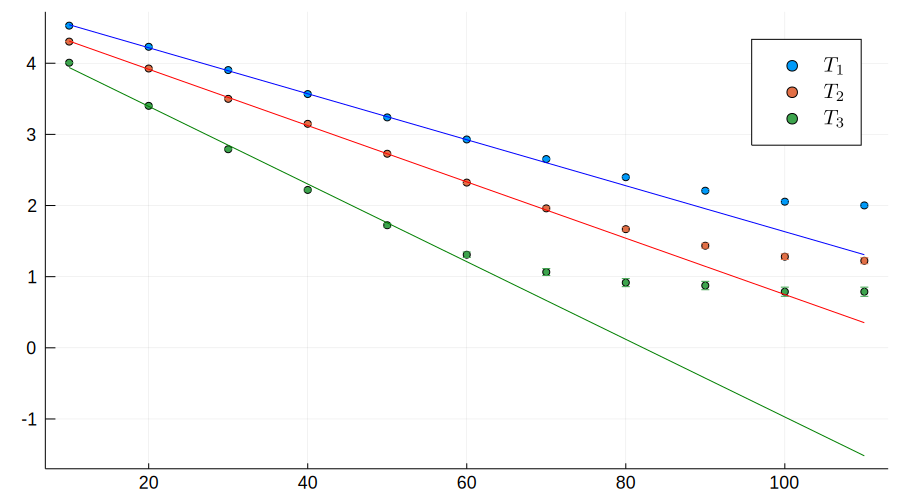

In [22]:
scatter(val(distances), [val(ln_theta1_x), val(ln_theta2_x), val(ln_theta3_x)], label=[L"$T_1$" L"$T_2$" L"$T_3$"], 
    m=:circle, legendfont=14, tickfont=12, size=(900, 500),
    err=[unc(ln_theta1_x) unc(ln_theta2_x) unc(ln_theta3_x)])

plot!(val(distances), val(theta0_1) .+ val(distances) .* val(p1), color=:blue, label="")
plot!(val(distances), val(theta0_2) .+ val(distances) .* val(p2), color=:red, label="")
plot!(val(distances), val(theta0_3) .+ val(distances) .* val(p3), color=:green, label="")

In [23]:
p1 *= -100
p2 *= -100
p3 *= -100

K_3 = 79.5

K_1 = K_3 * r3 * p3^2 / (p1^2 * r1)

K_2 = K_3 * r3 * p3^2 / (p2^2 * r2)

println("Aluminium conductivity: ", K_1)
println("Laton conductivity: ", K_2)

Aluminium conductivity: (21.2 ± 1.5)·10^1

Laton conductivity: (15.1 ± 1.1)·10^1

